# ✈️Flight Pricing: Exploratory Data Analysis

## 1. Introduction
Understanding the factors that contribute to fluctuations in airline ticket prices, such as destination, airline, and departure time, can reveal meaningful patterns and relationships within the data. These insights can be uncovered through exploratory data analysis (EDA), forming the basis for data-driven decision-making in both business and travel planning contexts.

### Objective:
- Analyze the distribution of airline ticket prices to understand key statistics such as average, minimum, and maximum fares.
- Explore how destinations and airlines influence ticket pricing patterns.
- Investigate the impact of temporal factors such as departure time, airline, and cabin class fare variability

### Key questions:
1. What is the overall distribution of flight prices in the dataset?
2. Does the destination affect the ticket price?
3. How does the departure time influence the ticket price?

## 2. Data Preparation

### 2.1 Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Magic Command
%matplotlib inline

### 2.2 Dataset Overview & Loading
This dataset is sourced from Kaggle:  
[Flight Ticket Price Prediction – Kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)

Including features such as:
- Airline, Flight, Source City, Departure Time
- Stops, Arrival Time, Destination City
- Class, Duration, Days Left, and Price


In [2]:
# Data Loading
def read_csv():
    try:
        # Read *csv file
        df = pd.read_csv('../data/Flight_Price_Prediction.csv')
        df.drop('Unnamed: 0', axis = 1, inplace = True)
        return df
        
    except Exception as e:
        print("Failed to execute: ", e)
        
df = read_csv()
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Dataset Shape

df.shape

(300153, 11)

Dataset Shape:
- Number of rows: 300,153  
- Number of columns: 11

In [4]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Dataset Information
- Object columns: 8 — `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`
- Numerical columns: 3 — `duration (float64)`, `days_left (int64)`, `price (int64)`
- No missing values.

In [5]:
# Dataset Describes

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Dataset Summary Statistic
- `duration`: Average ~12 hours, Maximum ~49 hours and Minimum ~0.8 hours.
- `days_leftt`: Average ~26 days before departure, with a range from 1 to 49 days.
- `price`: Average fare ~20,890 units, Minimum ~1,105 and Maximum ~123,071 units.

In [6]:
# Dataset Columns

list(df.columns)

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

### 2.3 Data Cleaning and Preprocessing

#### Step 1: Missing Values

In [7]:
# Missing Value

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

> The dataset is clean and ready for preprocessing and analysis.

#### Step 2: Duplicate Values

In [8]:
#Duplicate Data

df.duplicated().sum()

np.int64(0)

> The dataset contains no duplicate records.

#### Step 3: Replace Values

In [9]:
# Stops Counts

df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

The `stops` (object) column contains 3 distinct categories:
- one: 250,863 records
- zero: 3,6004 records
- two_or_more: 13,286 records

In [10]:
# Replace Value in Stops

df['stops_rep'] = df['stops'].replace({
    'zero': 0,
    'one': 1,
    'two_or_more':2
}).astype(int)

Converted `stops` (object) into numerical type in a new column `stops_rep` (int64) using the following mapping:
- `zero` → 0
- `one` → 1
- `two_or_more` → 2

In [11]:
# Count Values of stops replace

df['stops_rep'].value_counts()

stops_rep
1    250863
0     36004
2     13286
Name: count, dtype: int64

The following is the value distribution in `stops_rep` after converting `stops`:
- 1: 250,863 records
- 0: 3,6004 records
- 2: 13,286 records

In [12]:
# Convert Time to Minutes

df['duration_min'] = df['duration']*60

Converted `duration` (in hours) to a new column `duration_min` (in minutes) by `duration x 60`

In [13]:
# Preview of `Duration_min`

list(df['duration_min'])[:10]

[130.2,
 139.8,
 130.2,
 135.0,
 139.8,
 139.8,
 124.80000000000001,
 130.2,
 130.2,
 135.0]

#### Step 4: Outliers Interquartile Range (IQR) Filtering with Boxplot

The following `price` variable represents flight ticket costs.

Outliers were filtered using the **Interquartile Range (IQR):

- **Lower bound** = Q1 − 1.5 × IQR  
- **Upper bound** = Q3 + 1.5 × IQR

Boxplot shows the distribution of `price` **Before and After Filtering Outliers**
After filtering, the `price` shows a clean distribution with no outliers detected.

In [14]:
# Outlier Filtering with IQR — Price

# IQR Filtering
def filter_price_outlier():
    
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return df[(df['price'] >= lower) & (df['price'] <= upper)]

price_filtered_df = filter_price_outlier()

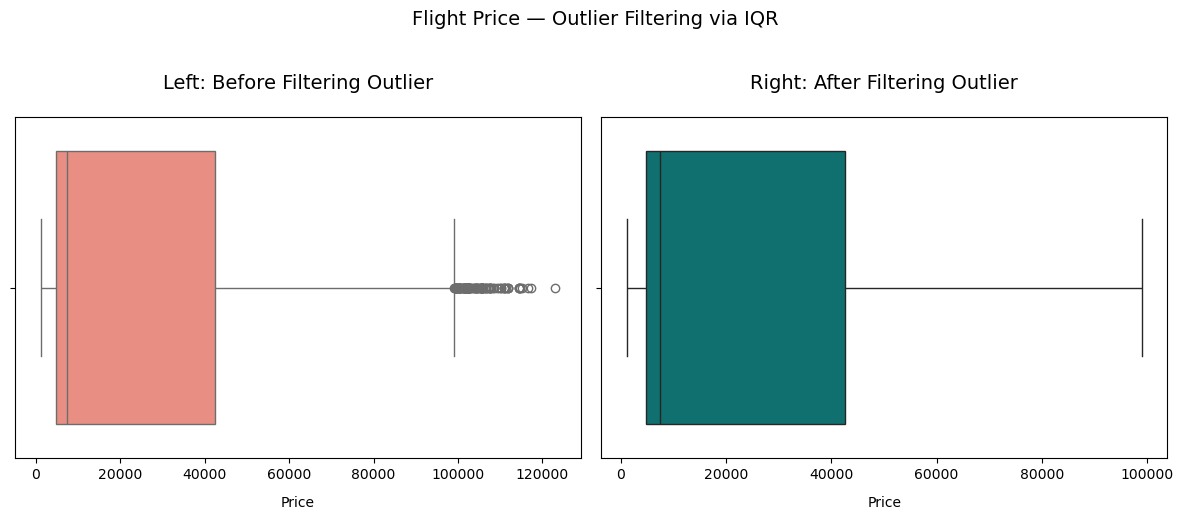

In [15]:
# Boxplot
def boxplot_outlier():
    # Create Figure
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    # Set width space
    plt.subplots_adjust(wspace = 0.4)
    
    # Price Before Outlier Filtering
    sns.boxplot(x = df['price'], ax = axes[0], color = "salmon")
    # Set title
    axes[0].set_title("Left: Before Filtering Outlier", fontsize = 14, pad = 20)
    # Set x label
    axes[0].set_xlabel("Price", fontsize = 10, labelpad = 10)
    
    # Price After Outlier Filtering
    sns.boxplot(x = price_filtered_df['price'], ax = axes[1], color = "teal")
    # Set title
    axes[1].set_title("Right: After Filtering Outlier", fontsize = 14, pad = 20)
    # Set x label
    axes[1].set_xlabel("Price", fontsize = 10, labelpad = 10)

    # Set subtitle
    fig.suptitle("Flight Price — Outlier Filtering via IQR", fontsize = 14, y = 1.03)

    # Show boxplot
    plt.tight_layout()
    plt.show()
    
boxplot_outlier()

## 3. Exploratory Data Analysis (EDA)

### 3.1 What is the overall distribution of flight prices in the dataset?

#### a1) What is the minimum, maximum, and average ticket price overall?

In [16]:
# The Minimum, Maximum, and Average Ticket Price

# price_filtered_df: Dataframe After IQR Filtering
price_filtered_df['price'].describe()

count    300030.000000
mean      20855.326674
std       22638.775853
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max       98972.000000
Name: price, dtype: float64

Ticket Price Summary:
- The minimum ticket price: **1,105 units**
- The maximum ticket price: **98,972 units**
- The average ticket price: **20,855 units**

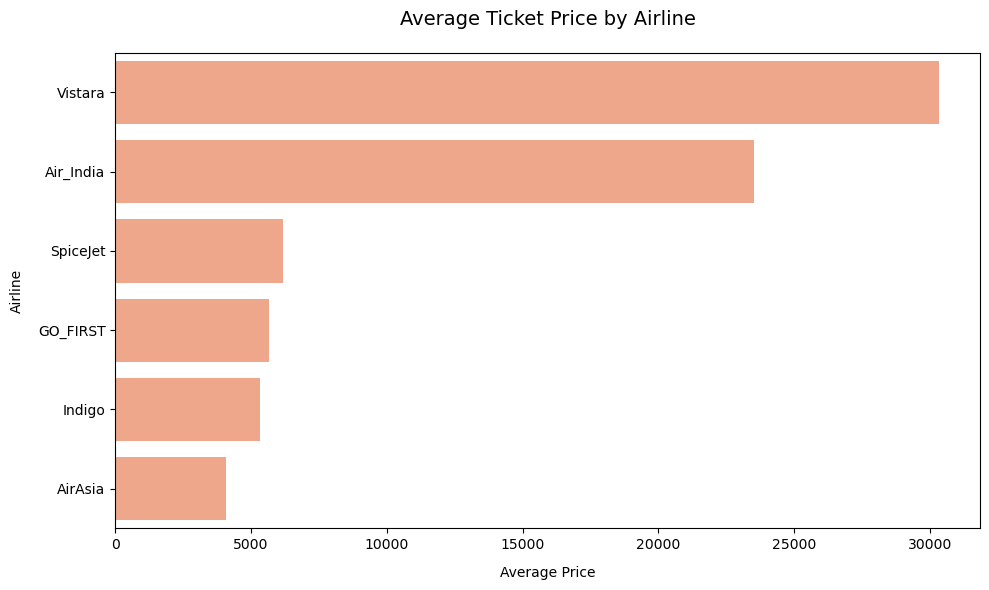

In [17]:
# Insight: Average Ticket Price by Airline

# Get the mean ticket price by airlines
airline_mean_price = price_filtered_df.groupby('airline')['price'].mean(numeric_only = True).sort_values(ascending = False)

def visualize_airline_prices():
    # Create Figure
    plt.figure(figsize = (10,6))
    
    # Create bar chart
    sns.barplot(x = airline_mean_price.values, y = airline_mean_price.index, color = "lightsalmon")
    # Set title
    plt.title("Average Ticket Price by Airline", fontsize = 14, pad = 20)
    # Set label
    plt.xlabel("Average Price", fontsize = 10, labelpad = 10)
    plt.ylabel("Airline", fontsize = 10, labelpad = 10)

    # Show bar chart
    plt.tight_layout()
    plt.show()
    
visualize_airline_prices()

- **Vistara** (full-service) has the highest average ticket price (30,000 units), followed by **Air India** (below 25,000 units).
- **AirAsia** (low-cost) shows the lowest average fare, at under 5,000 units.
- Overall, **full-service airlines** are noticeably more expensive than **low-cost carriers**.

#### a2) How are prices distributed?

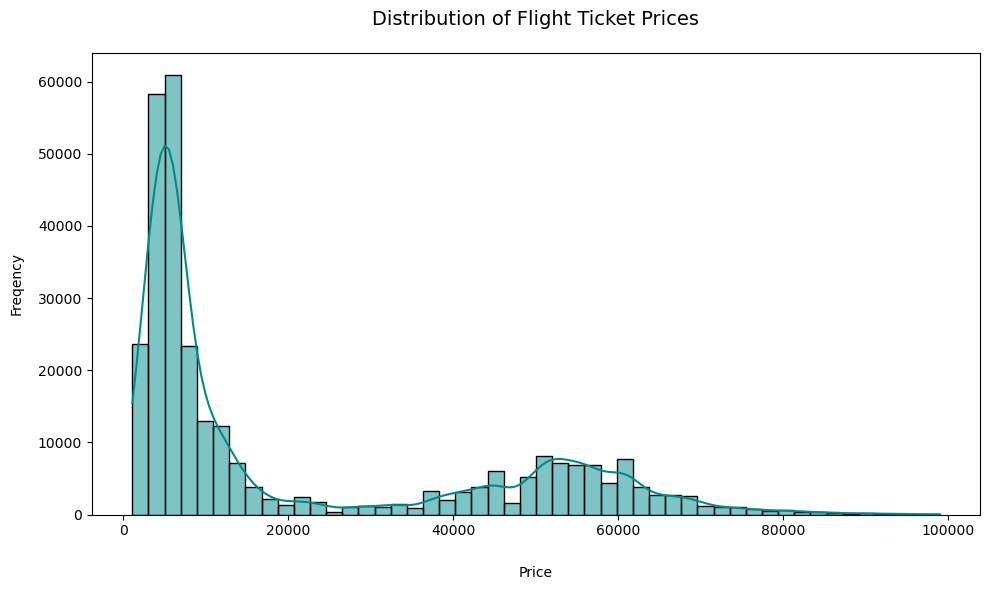

In [18]:
def visualize_ticket_price_hist(df):
    # Create Figure
    plt.figure(figsize = (10,6))
    
    # Create histogram
    sns.histplot(data = df['price'], bins = 50,  kde = True, color = "darkcyan")
    # Set title
    plt.title("Distribution of Flight Ticket Prices", fontsize = 14, pad = 20)
    # Set label
    plt.xlabel("Price", fontsize = 10, labelpad = 20)
    plt.ylabel("Freqency", fontsize = 10, labelpad = 10)

    # Show histogram
    plt.tight_layout()
    plt.show()

visualize_ticket_price_hist(price_filtered_df)

- Flight ticket prices show a **clear distribution**,
- with most tickets priced under **20,000 units**,
- and a small number of **high-priced cases** observed in specific flight groups.

### 3.2 Does the destination affect the ticket price?

#### b1) Are popular destinations associated with higher fares?

In [19]:
def analyze_top3_dest_prices(df):
    # Get top 3 destinations
    top_dest_df = df['destination_city'].value_counts().index[:3]

    # Get the average ticket price for the top 3 destinations
    top_dest_mean = df[df['destination_city'].isin(top_dest_df)]\
                    .groupby('destination_city')['price'].mean(numeric_only=True).sort_values(ascending = False)
    
    # Get any destinations
    any_dest_df = df[~df['destination_city'].isin(top_dest_df)]

    # Get the average ticket price for any destination
    any_dest_mean = any_dest_df.groupby('destination_city')['price'].mean(numeric_only = True).sort_values(ascending = False)
    
    # Add a boolean column ['top3_dest'] is in the top 3 destinations
    df['top3_dest'] = df['destination_city'].isin(top_dest_df)
    
    return df, top_dest_mean

top_dest, top_dest_mean = analyze_top3_dest_prices(price_filtered_df)

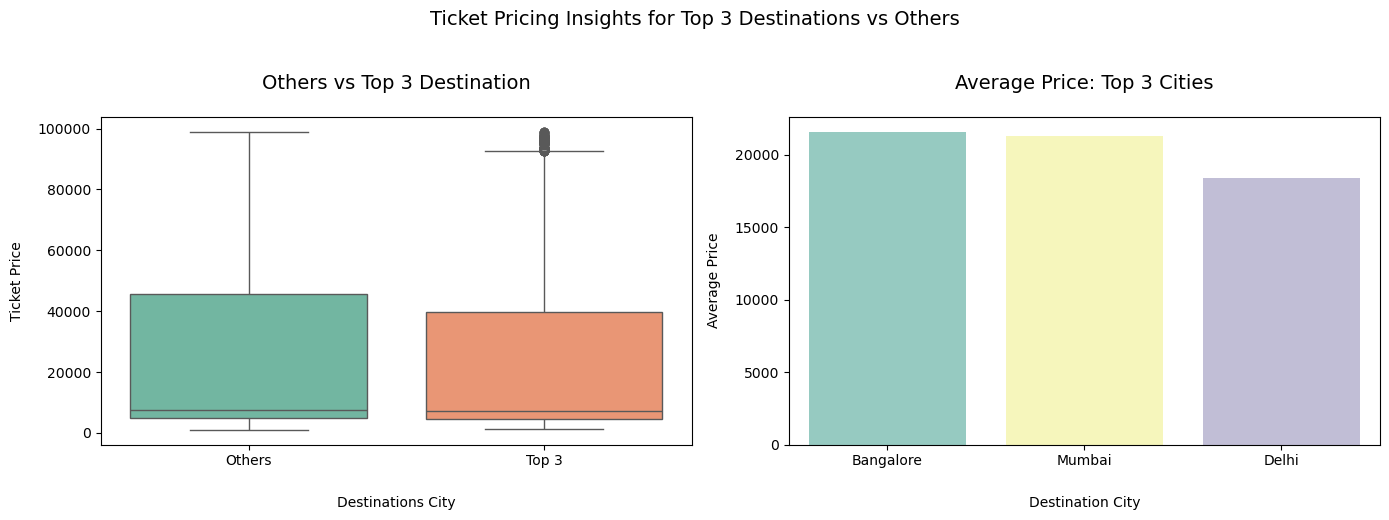

In [20]:
def visualize_dest_prices_comparison(top_dest, top_dest_mean):
    # Create Figure for subplot
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
    # Set width space
    plt.subplots_adjust(wspace = 0.4)
    
    # Boxplot
    sns.boxplot(x = top_dest['top3_dest'], y = top_dest['price'], data = top_dest, ax = axes[0], palette = "Set2")
    # Set title
    axes[0].set_title("Others vs Top 3 Destination", fontsize = 14, pad = 20)
    # Set label
    axes[0].set_xticklabels(["Others", "Top 3"])
    # Set label
    axes[0].set_xlabel("Destinations City", fontsize = 10, labelpad = 20)
    axes[0].set_ylabel("Ticket Price", fontsize = 10, labelpad = 10)
    
    # Create bar chart
    sns.barplot(x = top_dest_mean.index, y = top_dest_mean.values, ax = axes[1], palette = "Set3")
    # Set title
    axes[1].set_title("Average Price: Top 3 Cities", fontsize = 14, pad = 20)
    # Set label
    axes[1].set_xlabel("Destination City", fontsize = 10, labelpad = 20)
    axes[1].set_ylabel("Average Price", fontsize = 10, labelpad = 10)

    # Set subtitle
    fig.suptitle("Ticket Pricing Insights for Top 3 Destinations vs Others", fontsize = 14, y = 1.03)

    # Show subplot
    plt.tight_layout()
    plt.show()

visualize_dest_prices_comparison(top_dest, top_dest_mean)

- The top 3 flight destinations (Bangalore, Mumbai, Delhi) show stable and relatively low ticket prices compared to other cities.  
- **Bangalore** has the highest average price (above ~20,000 units), possibly due to longer distance, higher demand, or flight class.  
- **Delhi** offers the lowest average price within the group (under ~20,000 units), making it a budget-friendly option.
- This suggests that popularity alone doesn't fully determine fare levels; prices vary by city.

#### b2) Do prices differ by airline for the same destination?

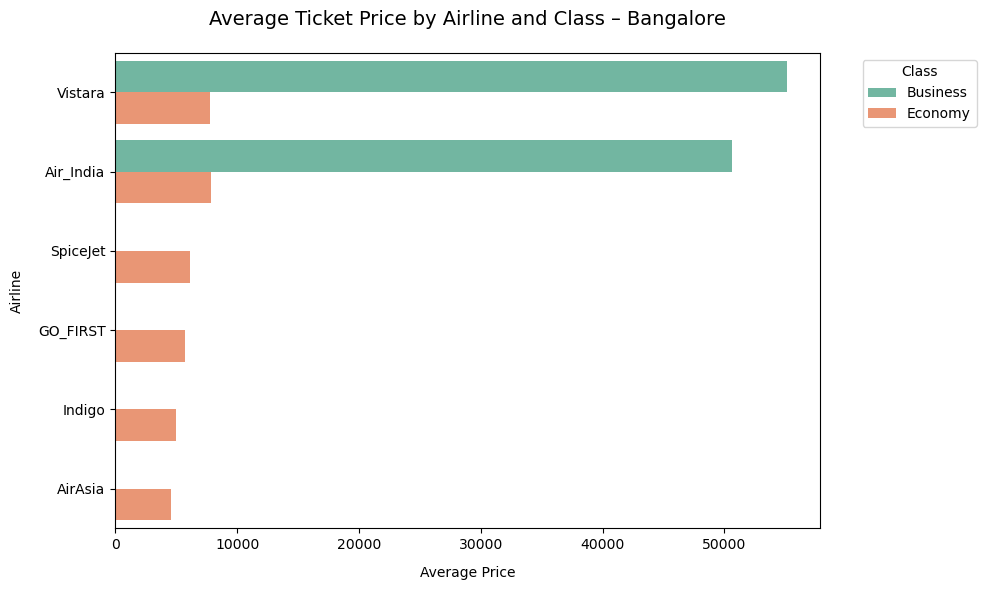

In [21]:
# Select Data - Bangalore
selected_df = price_filtered_df[price_filtered_df['destination_city'] == 'Bangalore']

# Average Ticket Price per Airline
mean_price = selected_df.groupby(['airline', 'class'])['price'].mean(numeric_only = True).sort_values(ascending = False).reset_index()

def visualize_ticket_price_bar(df):
    # Create figure
    plt.figure(figsize = (10,6))
    
    # Create bar chart
    sns.barplot(x = "price", y = "airline", hue = "class", data = df, palette = "Set2")
    # Set title
    plt.title("Average Ticket Price by Airline and Class – Bangalore", fontsize = 14, pad = 20)
    # Set label
    plt.xlabel("Average Price", fontsize = 10, labelpad = 10)
    plt.ylabel("Airline", fontsize = 10, labelpad = 10)
    # Set legend
    plt.legend(title = "Class", bbox_to_anchor = (1.05, 1), loc = "upper left")

    # Show bar chart
    plt.tight_layout()
    plt.show()

visualize_ticket_price_bar(mean_price)

- For Business class, **Vistara** and **Air India** have the highest average ticket price (over ~45,000 units).
- In Economy class, average prices are below 10,000 units, particularly with **AirAsia** and **Indigo**.
- Both the airline and cabin class **significantly affect** ticket pricing, even when flying to the same destination.

### 3.3 How does the departure time influence the ticket price?

#### c1) How do prices vary across different times of the day?

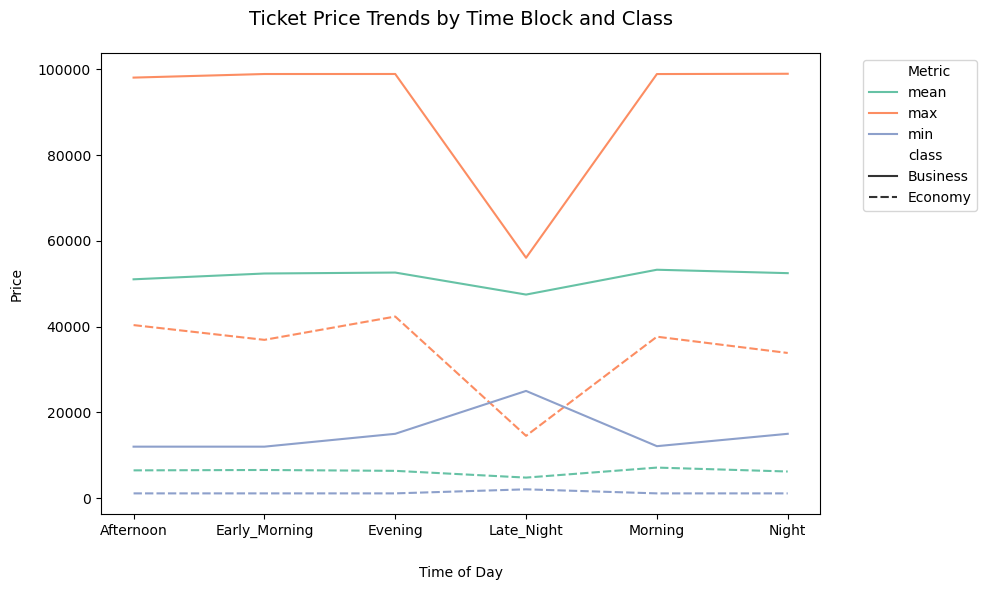

In [22]:
# Average, Max, and Min by Time
time_block_df = price_filtered_df.groupby(['departure_time', 'class'])['price'].agg(['mean', 'max', 'min']).reset_index()

# Convert to Metric
melted_df = time_block_df.melt(id_vars=['departure_time', 'class'], value_vars = ['mean', 'max', 'min'], var_name = 'Metric', value_name ='Price')

def visualize_ticket_price_trends(df):
    # Create Figure
    plt.figure(figsize = (10, 6))
    
    # Create lineplot
    sns.lineplot(data = df, x= "departure_time", y = "Price", hue = "Metric", style = "class", palette = "Set2")
    # Set title
    plt.title("Ticket Price Trends by Time Block and Class", fontsize = 14, pad = 20)
    # Set label
    plt.xlabel("Time of Day", fontsize = 10, labelpad = 20)
    plt.ylabel("Price",fontsize = 10,  labelpad = 10)
    # Set legend
    plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

    # Show line chart
    plt.tight_layout()
    plt.show()

visualize_ticket_price_trends(melted_df)

- Ticket prices for both **Business** and **Economy** classes are highest during the **Morning-Afternoon**, then dip noticeably during the **Late Night**.
- In contrast, both the **mean prices remain relatively stable** throughout the day.
- **Departure time and cabin class have a clear impact on price variation**,
- possibly driven by market demand, airline strategy, passenger behavior, and other factors.

#### c2) Which time block tends to be most or least expensive?

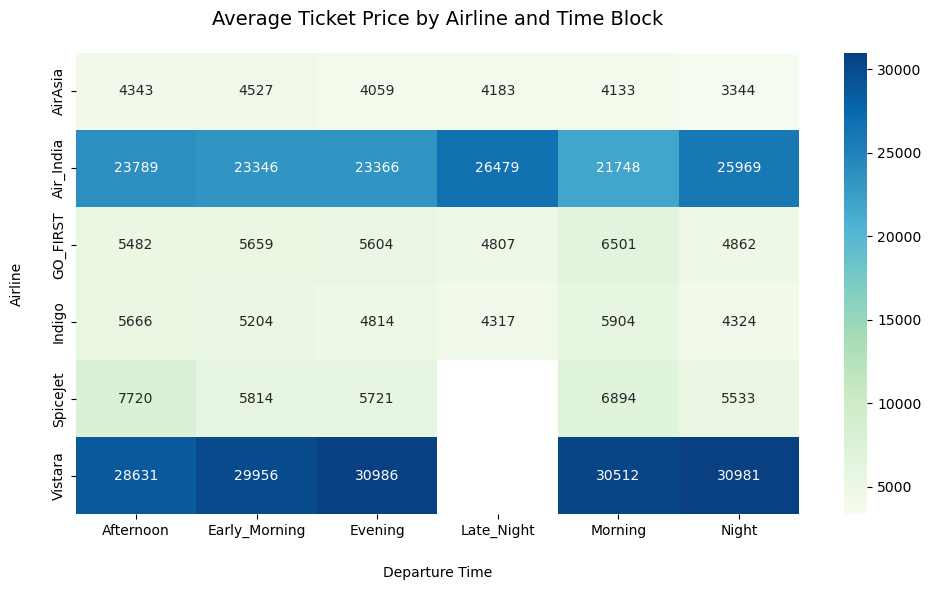

In [23]:
# Calculate Price by Airline and reset_index
airline_time_price = price_filtered_df.groupby(['airline', 'departure_time'])['price']\
                    .mean(numeric_only = True).sort_values(ascending = False).reset_index()

def visualize_airline_time_prices(df):
    # Create Figure
    plt.figure(figsize = (10, 6))
    
    # Create heatmap
    sns.heatmap(data = df.pivot(index = "airline", columns = "departure_time", values = "price"), annot = True, fmt = ".0f", cmap = "GnBu")
    # Set title
    plt.title("Average Ticket Price by Airline and Time Block", fontsize = 14, pad = 20)
    # Set label
    plt.xlabel("Departure Time", fontsize = 10, labelpad = 20)
    plt.ylabel("Airline", fontsize = 10, labelpad = 20)
    
    # Show heatmap
    plt.tight_layout()
    plt.show()
    
visualize_airline_time_prices(airline_time_price)

- **Vistara** (full-service) has the highest average ticket price during the **Evening** time block (~30,986 units).
- **AirAsia** (low-cost) shows the lowest average price in the **Evening** period (~4,059 units).
- Overall, ticket prices tend to be **most expensive in the Evening** and **lowest during Late-Night hours**.

## 4. Summary of Insights
📊 Flight ticket prices are well-distributed across destinations and airline types.  
**Full-service** airlines such as **Vistara** and **Air India** 🧳 are noticeably more expensive  
than **low-cost** carriers like **AirAsia** and **IndiGo** 💸.

🌍 The top 3 destinations (**Bangalore**, **Mumbai**, **Delhi**) show relatively stable and low average prices compared to other cities.  
In **Bangalore**, for example, **Vistara** (full-service) averages over ~45,000 units 💼,  
while **AirAsia** and **IndiGo** (low-cost) offer fares below ~10,000 units 🪑.

🕓 Ticket prices peak during the **Evening** 🌇, particularly for full-service airlines,  
and drop significantly during **Late-Night** hours 🌙.

🎯 **Destination**, **departure time**, **airline**, and **cabin class** all contribute to fare variability,  
suggesting that pricing is shaped by **market demand** 📈, **airline strategy** 🧠, and **passenger behavior** 🧍‍♀️🧍‍♂️.